In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.math import confusion_matrix
from tensorflow.keras.models import Sequential


In [2]:
#if kernel goes daed
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [3]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
print(x_train[3])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  124 253 255  63   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  96
  244 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127
  251 251 253  62   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

In [6]:
x_train[3].shape

(28, 28)

<function matplotlib.pyplot.show(close=None, block=None)>

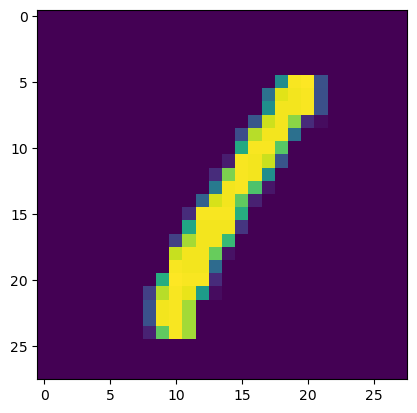

In [7]:
plt.imshow(x_train[3])
plt.show
# print(y_train[3])

In [8]:
print(y_test.shape,y_train.shape)

(10000,) (60000,)


In [9]:
x_test = x_test/255
x_train = x_train/255

In [10]:
print(np.unique(y_train))
print(np.unique(y_test))
# print(x_train[3])

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


# CNN

In [11]:
model = Sequential()

In [12]:
model.add(Flatten(input_shape = (28,28)))
model.add(Dense(100,activation='relu'))
model.add(Dense(100,activation='relu'))
model.add(Dense(10,activation='sigmoid'))

In [13]:
model.compile(optimizer='adam',
              metrics=['accuracy'],
              loss = 'sparse_categorical_crossentropy')

In [14]:
model.fit(x_train , y_train,epochs=10,validation_data=(x_train , y_train))

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2465 - accuracy: 0.9274 - val_loss: 0.1107 - val_accuracy: 0.9658
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1042 - accuracy: 0.9674 - val_loss: 0.0716 - val_accuracy: 0.9777
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0717 - accuracy: 0.9778 - val_loss: 0.0586 - val_accuracy: 0.9817
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0554 - accuracy: 0.9827 - val_loss: 0.0437 - val_accuracy: 0.9861
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0451 - accuracy: 0.9856 - val_loss: 0.0350 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0372 - accuracy: 0.9880 - val_loss: 0.0370 - val_accuracy: 0.9879
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0312 - accuracy: 0.9897 - val_loss: 0.0178 - val_accuracy:

In [15]:
loss , accuracy = model.evaluate(x_test,y_test)
print('acc=',accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.0931 - accuracy: 0.9778
acc= 0.9778000116348267


<function matplotlib.pyplot.show(close=None, block=None)>

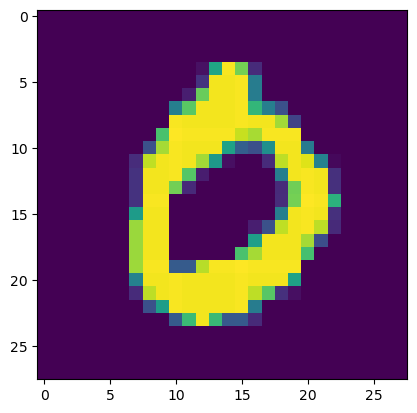

In [16]:
plt.imshow(x_test[3])
plt.show

In [17]:
print(y_test[3])

0


In [18]:
y_pred = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [19]:
print(y_pred[3])

[1.0000000e+00 1.1646600e-06 1.3614789e-02 1.9013268e-04 3.0964881e-03
 9.2572933e-05 9.0374422e-01 2.1805917e-03 5.0483382e-06 1.1134449e-03]


In [20]:
np.argmax(y_pred[3])

0

In [21]:
y_pred_lebels=[np.argmax(i) for i in y_pred]
print(y_pred_lebels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 6, 0, 7, 1, 1, 2, 1, 

In [22]:
con_mat = confusion_matrix(y_test,y_pred_lebels)

Text(158.22222222222223, 0.5, 'True lables')

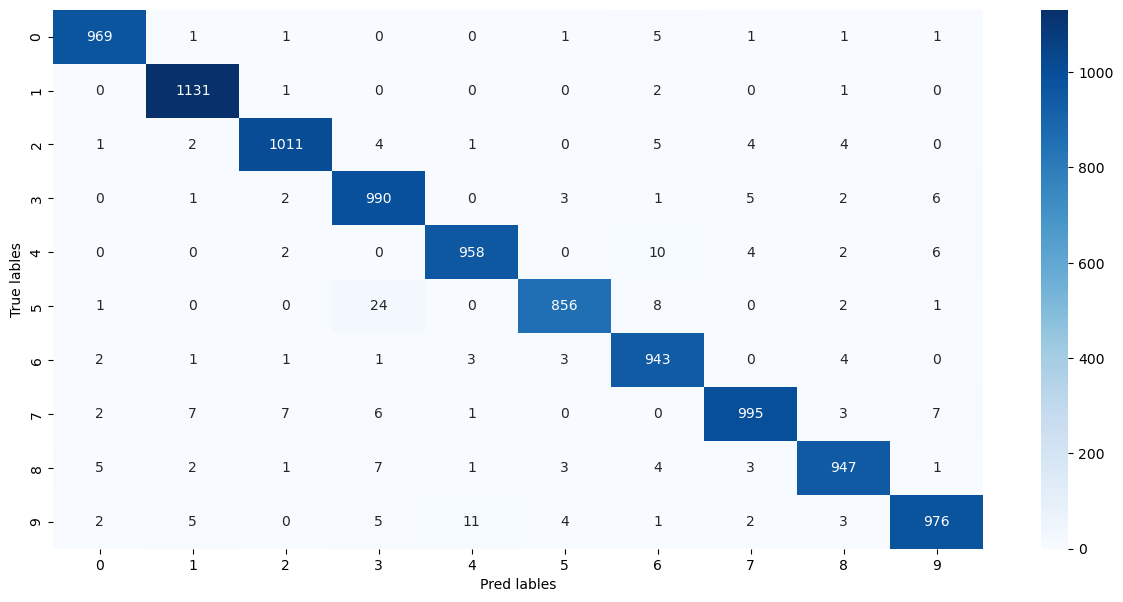

In [23]:
plt.figure(figsize=(15,7))
sns.heatmap(con_mat,annot=True,fmt='d',cmap='Blues')
plt.xlabel('Pred lables')
plt.ylabel('True lables')


9
9


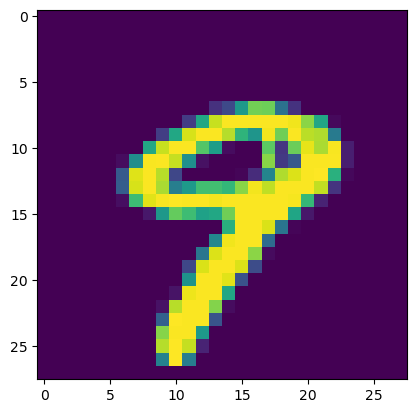

In [24]:
plt.imshow(x_test[9])
plt.show
print(y_test[9])
print(y_pred_lebels[9])

In [25]:
ip_img = cv2.imread('digit_7.jpeg')

In [26]:
type(ip_img)

numpy.ndarray

In [27]:
# cv2.imshow('image',ip_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [28]:
ip_img.shape

(340, 338, 3)

In [29]:
gray_img_ip = cv2.cvtColor(ip_img,cv2.COLOR_RGB2GRAY)

In [30]:
gray_img_ip.shape

(340, 338)

In [31]:
resized_ip_img = cv2.resize(gray_img_ip,(28,28))

In [32]:
resized_ip_img.shape

(28, 28)

In [33]:
std_ip_img = resized_ip_img/255

In [34]:
ip_reshaped_array = np.reshape(std_ip_img,[1,28,28])

In [35]:
prediction = model.predict(ip_reshaped_array)
prediction_label = np.argmax(prediction)
print("The Handwritten Digit is Recognized as :: ", prediction_label)

1/1 [==============================] - 0s 32ms/step
The Handwritten Digit is Recognized as ::  0


In [36]:
ip_img_path = input("Enter The Path of Image")#"C:\Users\sanke\Downloads\digit_7.jpeg"

ip_img = cv2.imread(ip_img_path)

gray_img_ip = cv2.cvtColor(ip_img,cv2.COLOR_RGB2GRAY)

resized_ip_img = cv2.resize(gray_img_ip,(28,28))

std_ip_img = resized_ip_img/255

ip_reshaped_array = np.reshape(std_ip_img,[1,28,28])

prediction = model.predict(ip_reshaped_array)

prediction_label = np.argmax(prediction)

print("The Handwritten Digit is Recognized as :: ", prediction_label)

Enter The Path of ImageC:\Users\sanke\Downloads\digit_7.jpeg
1/1 [==============================] - 0s 34ms/step
The Handwritten Digit is Recognized as ::  7
